In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [4]:
#Load Data
df = pd.read_csv(r"/content/heart.csv")
print(df.columns.to_list())

#Select Features and target
X = df[['restecg', 'oldpeak']]
Y = df['target']

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [6]:
#Missing Data Handling
print("Missing Values per column:\n ",df.isnull().sum())

#If missing cols
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
  if df[col].isnull().sum() > 0:
    df[col].fillna(df[col].median(), inplace =True)

#For categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

Missing Values per column:
  age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
#Scaling required for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#Split train and test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split Dataset train/test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=0
)

In [14]:
dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=0)


In [16]:
#Voting Hard and Soft


voting_hard = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('rf', rf)],
    voting='hard'
)
voting_hard.fit(X_train, Y_train)


#Soft Voting
voting_soft = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('rf', rf)],
    voting='soft'
)
voting_soft.fit(X_train, Y_train)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=0)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=0))],
                 voting='soft')

In [17]:
#Compare Accuracy
print("Hard Voting Accuracy: ", accuracy_score(Y_test, voting_hard.predict(X_test)))
print("Soft Voting Accuracy: ", accuracy_score(Y_test, voting_soft.predict(X_test)))

Hard Voting Accuracy:  0.7853658536585366
Soft Voting Accuracy:  0.7707317073170732


In [20]:
#Weights for soft voting

voting_weighted = VotingClassifier(
    estimators = [('dt', dt), ('knn',knn),('rf',rf)],
    voting = 'soft',
    weights = [1,2,3]
)
voting_weighted.fit(X_train, Y_train)
print("Weighted Voting Accuracy: ", accuracy_score(Y_test, voting_weighted.predict(X_test)))

Weighted Voting Accuracy:  0.7707317073170732


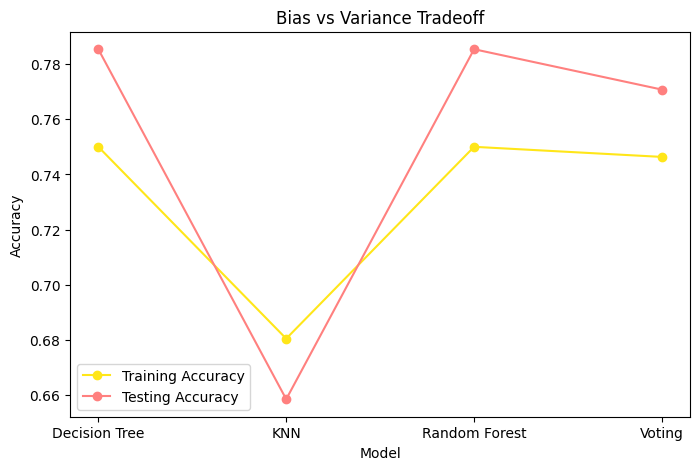

In [27]:
models = ['Decision Tree', 'KNN', 'Random Forest', 'Voting']
train_acc = [
    accuracy_score(Y_train, dt.fit(X_train, Y_train).predict(X_train)),
    accuracy_score(Y_train, knn.fit(X_train, Y_train).predict(X_train)),
    accuracy_score(Y_train, rf.fit(X_train, Y_train).predict(X_train)),
    accuracy_score(Y_train, voting_soft.fit(X_train, Y_train).predict(X_train))
]
test_acc = [
    accuracy_score(Y_test, dt.predict(X_test)),
    accuracy_score(Y_test, knn.predict(X_test)),
    accuracy_score(Y_test, rf.predict(X_test)),
    accuracy_score(Y_test, voting_soft.predict(X_test))
]

plt.figure(figsize=(8,5))
plt.plot(models, train_acc, label='Training Accuracy', marker='o', color=plt.cm.spring(0.9)) #I like this colormap :)
plt.plot(models, test_acc, label='Testing Accuracy', marker='o', color=plt.cm.spring(0.5))
plt.title('Bias vs Variance Tradeoff')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()